Problem statement (Term Deposit Sale)

Goal
Using the collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("bank-full.csv")

In [4]:
df.shape

(45211, 17)

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [10]:
df.columns[df.dtypes=='int64']

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Text(0.5, 0, 'No. of previous contacts')

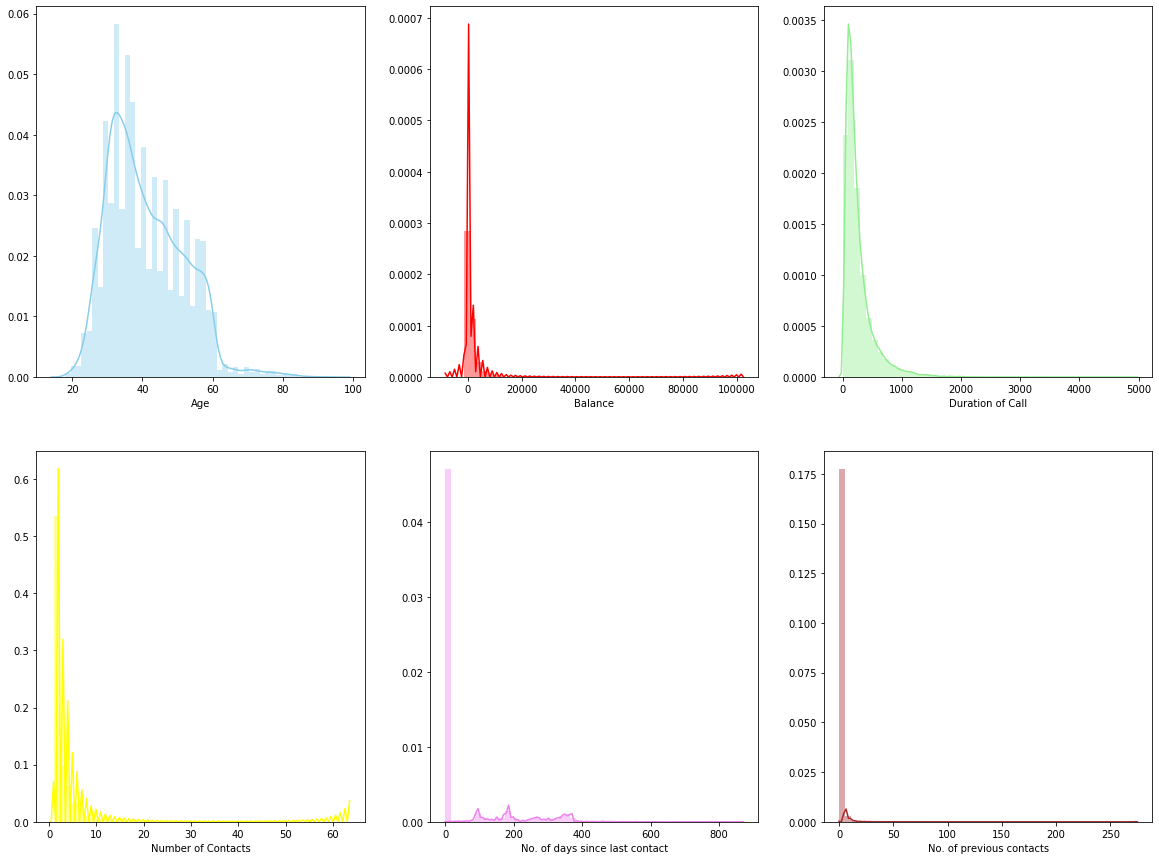

In [11]:
plt.figure(figsize= (20,15))
plt.subplot(2,3,1)
sns.distplot(df.age, color='skyblue')
plt.xlabel('Age')

plt.subplot(2,3,2)
sns.distplot(df.balance, color='red')
plt.xlabel('Balance')

plt.subplot(2,3,3)
sns.distplot(df.duration, color='lightgreen')
plt.xlabel('Duration of Call')

plt.subplot(2,3,4)
sns.distplot(df.campaign, color='yellow')
plt.xlabel('Number of Contacts')

plt.subplot(2,3,5)
sns.distplot(df.pdays, color='violet')
plt.xlabel('No. of days since last contact')

plt.subplot(2,3,6)
sns.distplot(df.previous, color='brown')
plt.xlabel('No. of previous contacts')

days, campaign and previous seem to be exhibiting characteristics of a factor variable. Need to check along with the target variable for the appriopriate conversion to factor variabe

Text(0.5, 0, 'Day in the Month')

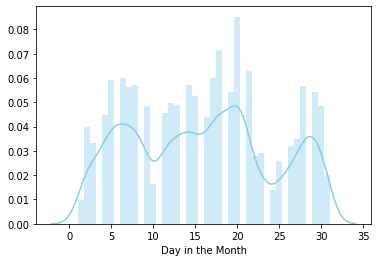

In [12]:
sns.distplot(df.day, color='skyblue')
plt.xlabel('Day in the Month')

In [13]:
age=pd.DataFrame(df.age, columns=['age'])
age['range']=pd.qcut(age.age,10)
age['Target']=df.Target
age.groupby('range').groups.keys()

dict_keys([Interval(17.999, 29.0, closed='right'), Interval(29.0, 32.0, closed='right'), Interval(32.0, 34.0, closed='right'), Interval(34.0, 36.0, closed='right'), Interval(36.0, 39.0, closed='right'), Interval(39.0, 42.0, closed='right'), Interval(42.0, 46.0, closed='right'), Interval(46.0, 51.0, closed='right'), Interval(51.0, 56.0, closed='right'), Interval(56.0, 95.0, closed='right')])

In [14]:
Pr=age.groupby('range').agg({"range":'count'})
Pr.columns=['N']
Pr['n']=age[age.Target=='yes'].groupby('range').count().Target
Pr['Perc Conv']=Pr.n/Pr.N
Pr

,N,n,Perc Conv
range,,,
"(17.999, 29.0]",5273,928,0.175991
"(29.0, 32.0]",5838,644,0.110312
"(32.0, 34.0]",3902,408,0.104562
"(34.0, 36.0]",3700,404,0.109189
"(36.0, 39.0]",4649,457,0.098301
"(39.0, 42.0]",3888,347,0.089249
"(42.0, 46.0]",4688,420,0.089590
"(46.0, 51.0]",4954,445,0.089826
"(51.0, 56.0]",4197,398,0.094830


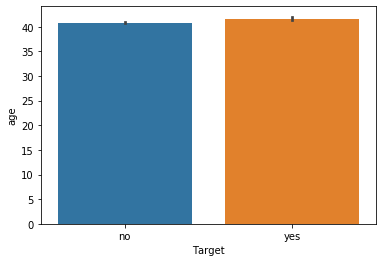

In [15]:
sns.barplot(df.Target,df.age)
#No major difference between ages for customers who subscribe term deposit 

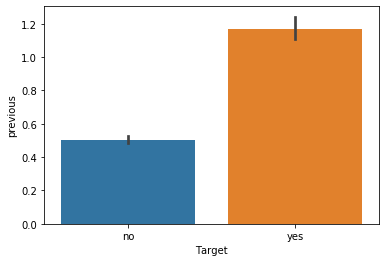

In [16]:
sns.barplot(df.Target,df.previous)

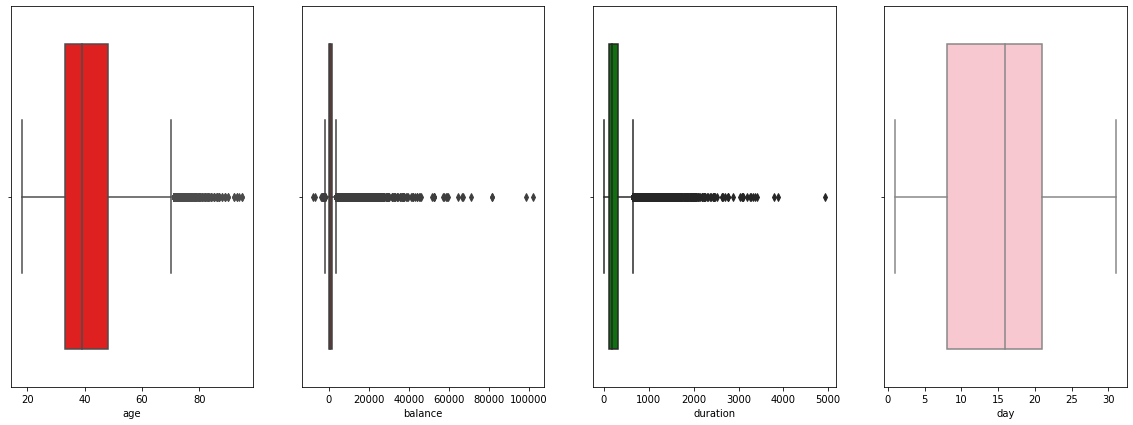

In [17]:
# check outliers in age, NUmber of calls
plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
sns.boxplot(df.age, color='red')

plt.subplot(1,4,2)
sns.boxplot(df.balance, color='brown')

plt.subplot(1,4,3)
sns.boxplot(df.duration, color='green')

plt.subplot(1,4,4)
sns.boxplot(df.day, color='pink')

Individually the first 3 variables have a lot of outliers. However these extreme values could be playing a 
significant role in deciding customer behaviour. Needs to be looked at along with other variables to see if these outliers are required to be treated or not

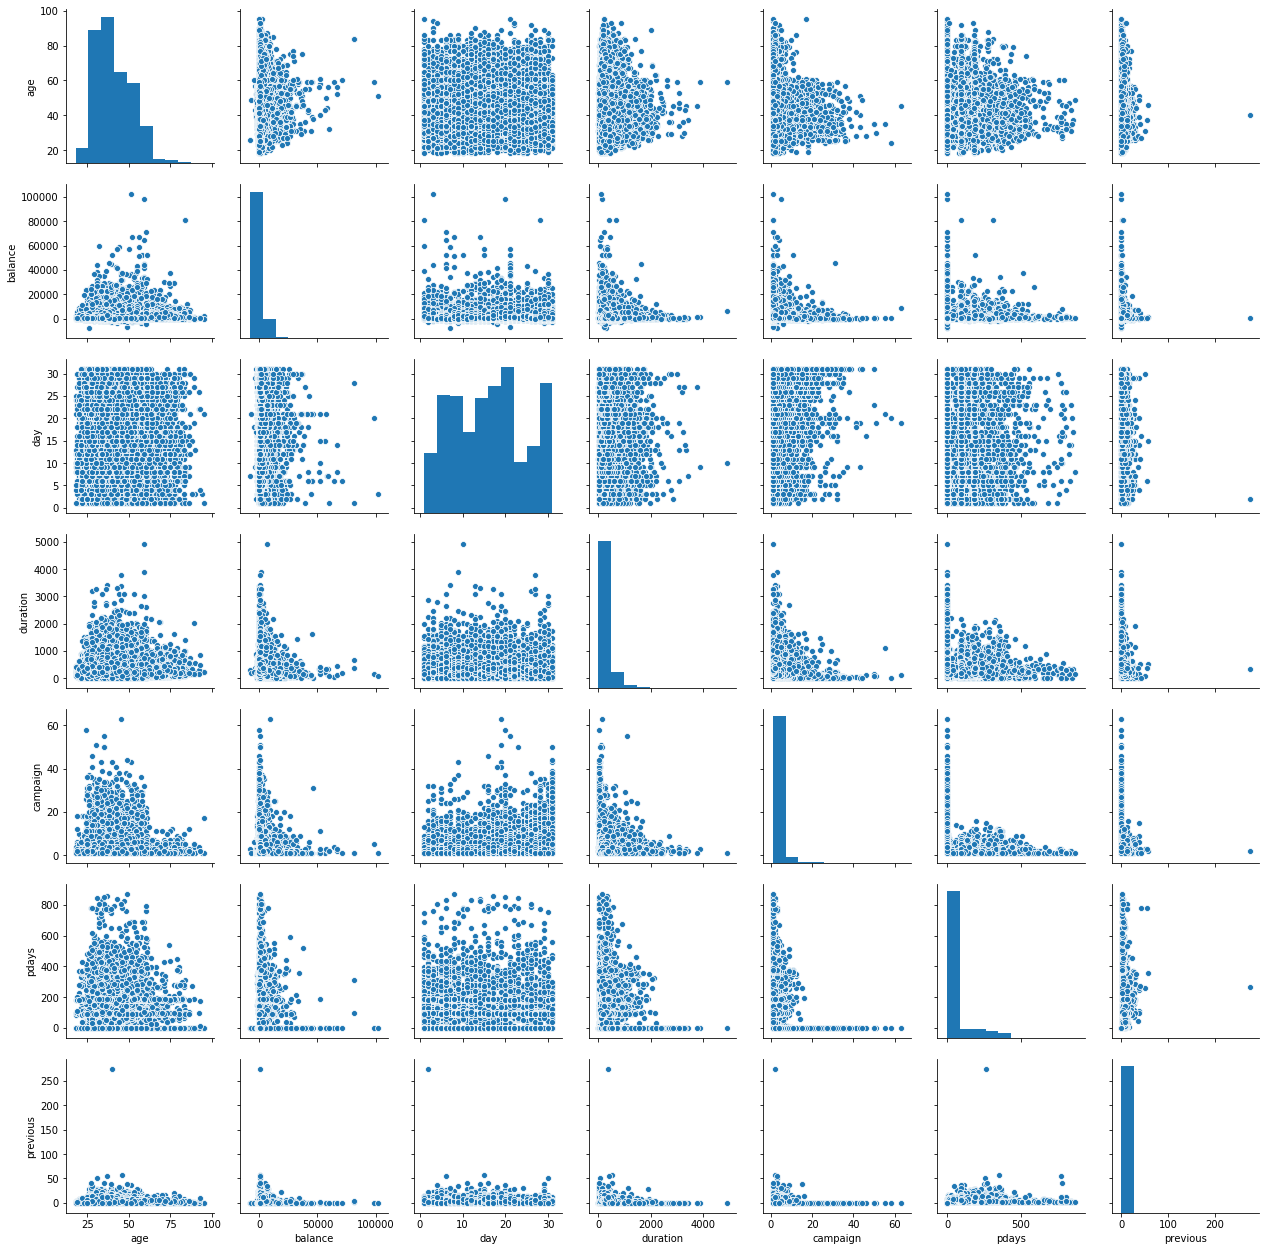

In [18]:
# find all the numeric variables
Df_num=df.select_dtypes(include=['int64','float64'])
Df_num.columns
sns.pairplot(Df_num)

<Figure size 720x576 with 0 Axes>

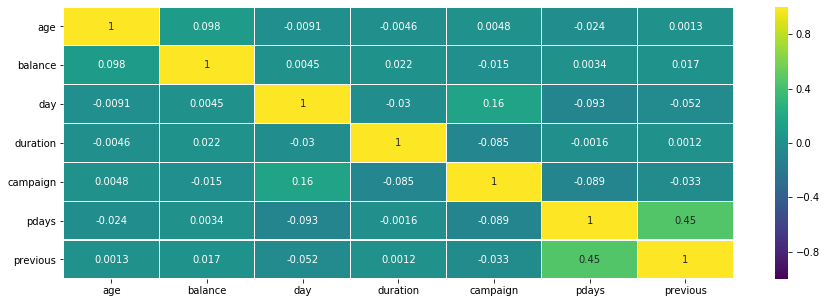

In [19]:
# No real pattern or correlation visible amongst the numeric variables as validated below
plt.figure(figsize=(10,8))

corr=Df_num.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True);

In [20]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

Text(0.5, 1.0, 'Target V Age')

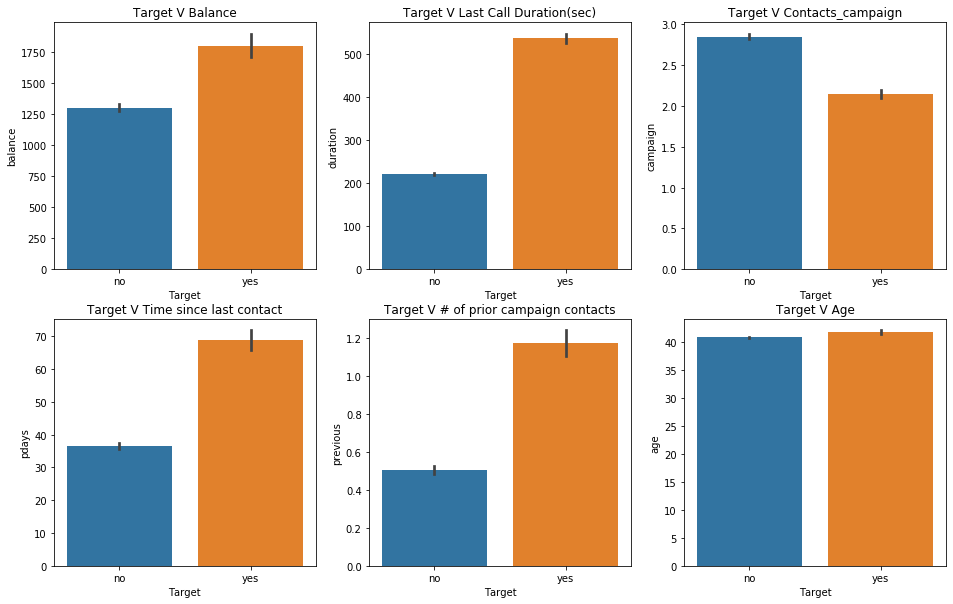

In [21]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.barplot(df.Target,df.balance)
plt.title("Target V Balance")
plt.subplot(2,3,2)
sns.barplot(df.Target,df.duration)
plt.title("Target V Last Call Duration(sec)")
plt.subplot(2,3,3)
sns.barplot(df.Target,df.campaign)
plt.title("Target V Contacts_campaign")
plt.subplot(2,3,4)
sns.barplot(df.Target,df.pdays)
plt.title("Target V Time since last contact")
plt.subplot(2,3,5)
sns.barplot(df.Target,df.previous)
plt.title("Target V # of prior campaign contacts")
plt.subplot(2,3,6)
sns.barplot(df.Target,df.age)
plt.title("Target V Age")


Balance, last call duration, time since last contact and number of contacts for prior campaigns seem to be significantly impacting chances of customer subscribing or not to the term loan. Higher values for the above factors seem to favor customer subscription. On the other hand, higher number of contacts for the current campaign seem to favor non-ubscription.
Age does not seem to matter.

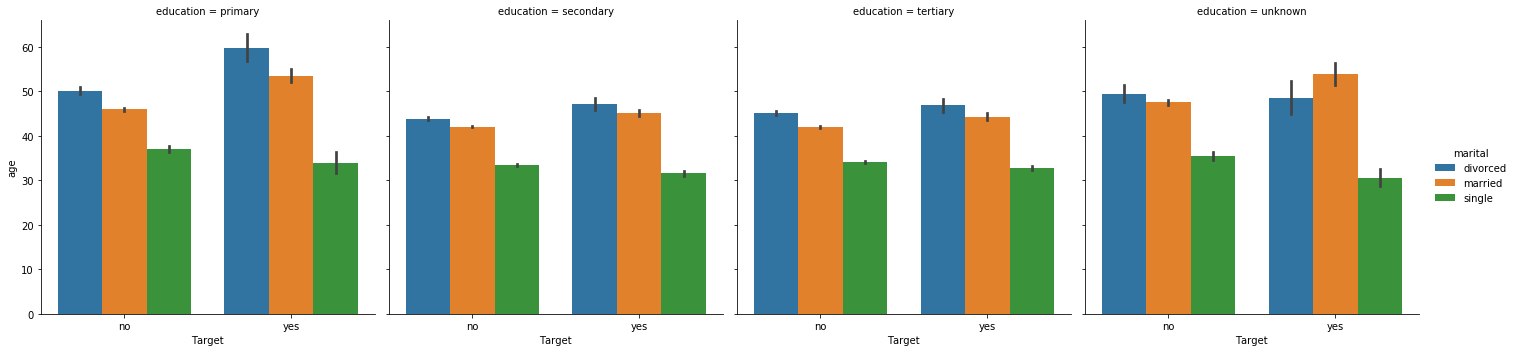

In [22]:
sns.catplot(x='Target', y='age', hue='marital',kind='bar' ,data=df,col='education')

Similar trends seen across all levels of education and marital status for both subscriptions and non-subscriptions.Age is higher for divorced followed by married and single in sequence for both classes of the target variable. The age seems to be higher for customers who subscribed for both Divorced and married whereas for singles its the opposite. The only exception to the trend is for customers subscribed but whose education details are unknown.

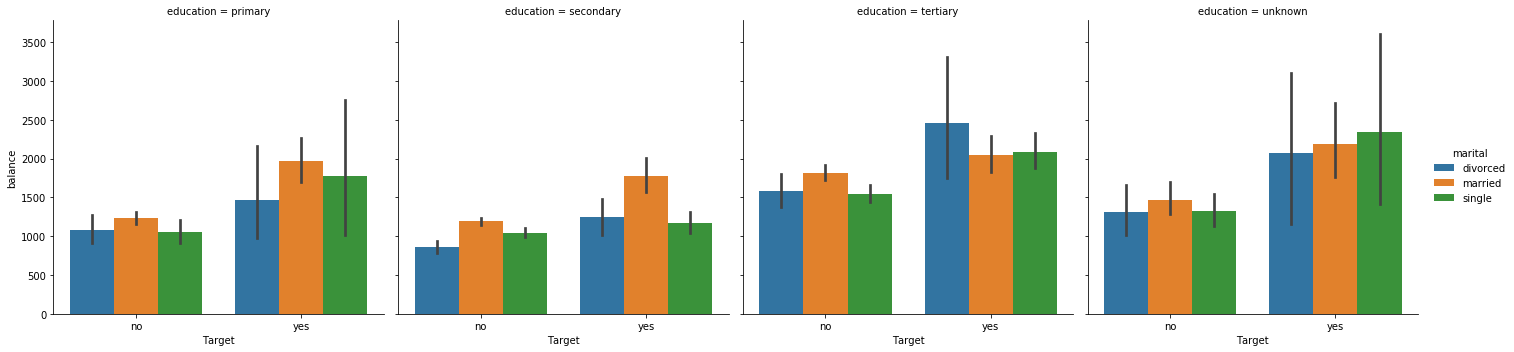

In [23]:
sns.catplot(x='Target', y='balance', hue='marital',kind='bar' ,data=df,col='education')

Divorced Customers with tertiary education and term loan subscription have highest balances. They could be the group to target followed by married people with higher balances across all levels of education.

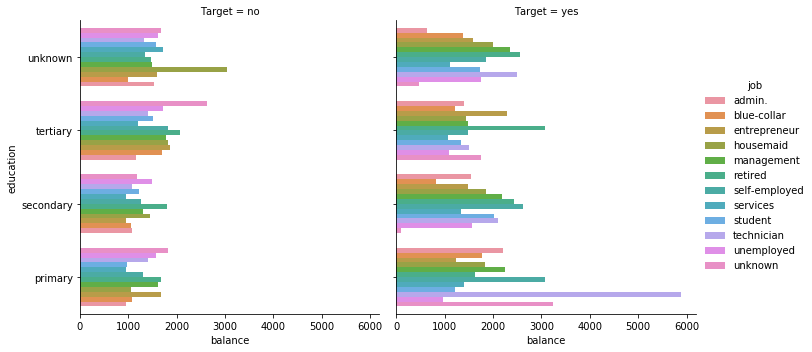

In [24]:
sns.catplot(y='education', x='balance',kind='bar' ,data=df,col='Target',ci=False, hue='job')


Retired customers with high balances say yes to campaign followed by self-employed and management. This holds true across all levels of education except in the primary education category where the technicians with high balances subscribe.

Text(0.5, 1.0, 'Subscription Vs Job')

<Figure size 576x864 with 0 Axes>

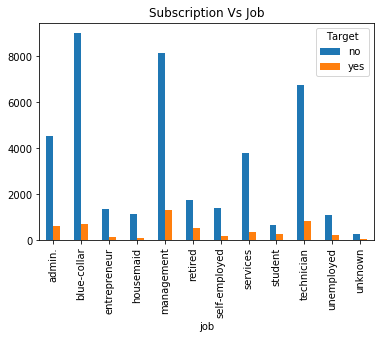

In [25]:
plt.figure(figsize=(8,12))
tab=pd.crosstab(df['job'],df['Target'])
tab.plot.bar()
plt.title("Subscription Vs Job")

Text(0.5, 1.0, 'Contact Vs Subscription')

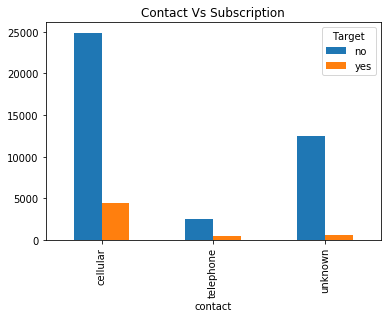

In [26]:
tab2=pd.crosstab(df['contact'],df['Target'])
tab2.plot.bar()
plt.xticks(rotation=90)
plt.title("Contact Vs Subscription")

Text(0.5, 1.0, 'Marital Status Vs Subscription')

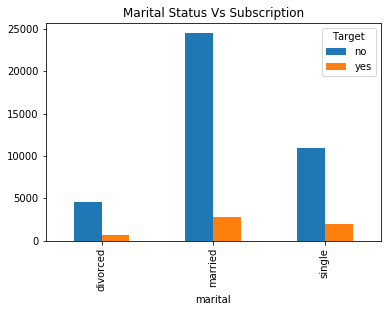

In [27]:
tab2=pd.crosstab(df['marital'],df['Target'])
tab2.plot.bar()
plt.xticks(rotation=90)
plt.title("Marital Status Vs Subscription")

Text(0.5, 1.0, 'Loan Vs Subscription')

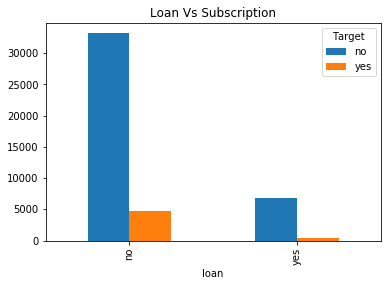

In [28]:
tab2=pd.crosstab(df['loan'],df['Target'])
tab2.plot.bar()
plt.xticks(rotation=90)
plt.title("Loan Vs Subscription")

In [29]:
#Prepare data for model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, auc

In [30]:
Df=pd.get_dummies(df.iloc[:,0:16], drop_first=True)

In [31]:
replaceStruct = {
                "Target":{"no": 0, "yes": 1 } 
                    }
df=df.replace(replaceStruct)

In [32]:
X=Df
y=df.Target
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=1)

In [33]:
#Train a logisctic regression model on training data
import statsmodels.api as sm
Logreg=sm.Logit(y_train.values, sm.add_constant(X_train.values)).fit()

Optimization terminated successfully.
         Current function value: 0.238149
         Iterations 8


Text(0.5, 1.0, 'Distribution of Predictions')

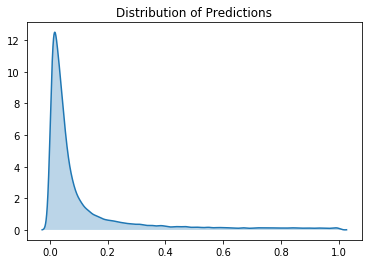

In [34]:
#Examine distribution of prediction
kde_res=sm.nonparametric.KDEUnivariate(Logreg.predict())
kde_res.fit()
plt.plot(kde_res.support, kde_res.density)
plt.fill_between(kde_res.support, kde_res.density, alpha=0.3)
plt.title("Distribution of Predictions")

In [ ]:
#Density is highest near 0 until 0.2, which means a lot of customers did not respond to the campaign

Accuracy: 0.90
Specificity :  0.9733621909597936
Sensitivity :  0.33849129593810445
F1-Score:0.44 
AUC :  0.9068304093303605


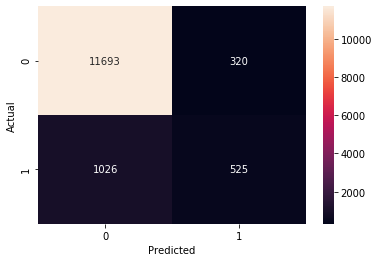

In [35]:
y_prob=Logreg.predict(sm.add_constant(X_test.values))
y_pred=y_prob>0.50
Acc_LogReg=accuracy_score(y_test,y_pred)
print("Accuracy: %.2f" %Acc_LogReg)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")
specificity_LogReg= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_LogReg)

sensitivity_LogReg = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_LogReg)

F1_LogReg= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_LogReg=roc_auc_score(y_test, y_prob)
print('AUC : ', AUC_LogReg)

In [36]:
#Change the threshold and compare results
y_pred=y_prob>0.25
Acc_LogReg=accuracy_score(y_test,y_pred)
print("Accuracy: %.2f" %Acc_LogReg)

cm=confusion_matrix(y_test,y_pred)
specificity_LogReg= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_LogReg)

sensitivity_LogReg = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_LogReg)

F1_LogReg= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_LogReg=roc_auc_score(y_test, y_prob)
print('AUC : ', AUC_LogReg)

Accuracy: 0.89
Specificity :  0.9299092649629568
Sensitivity :  0.6157317859445519
F1-Score:0.57 
AUC :  0.9068304093303605


In [37]:
# Try Decision tree classifiers
from sklearn.tree import DecisionTreeClassifier,  export_graphviz
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from io import StringIO

In [38]:
DT=DecisionTreeClassifier(criterion='gini', random_state=1)
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [39]:
print(DT.score(X_train, y_train))
print(DT.score(X_test, y_test))

1.0
0.8698024181657328


In [40]:
#Pruning since the above exhibits overfitting
DT_Pruned=DecisionTreeClassifier(random_state=1,max_depth=6)
DT_Pruned.fit(X_train,y_train)
DT_Acc=DT_Pruned.score(X_test, y_test)
print(DT_Pruned.score(X_train, y_train))
print(DT_Pruned.score(X_test, y_test))
print(classification_report(y_test, DT_Pruned.predict(X_test)))
print(roc_auc_score(y_test, DT_Pruned.predict_proba(X_test)[:,1]))

0.9077005719341485
0.9025361250368623
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.61      0.40      0.48      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564

0.8472614263840436


In [41]:
#max depth of 6 gives the best recall scores for yes which is stil fairly low

Specificity :  0.9679513859985016
Sensitivity :  0.39587362991618313
F1-Score:0.48 


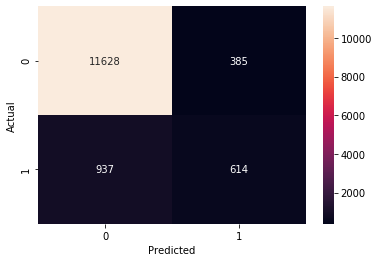

In [42]:
y_pred=DT_Pruned.predict(X_test)
Acc_Test_DT=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")
specificity_DT= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_DT)

sensitivity_DT = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_DT)

F1_DT= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

In [43]:
## Calculating feature importance

feat_importance = DT_Pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(X_train.columns, DT_Pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.557155
poutcome_success,0.265096
age,0.048206
month_mar,0.031731
month_oct,0.029681
contact_unknown,0.020380
day,0.009851
month_may,0.008778
pdays,0.007730
month_jun,0.007174


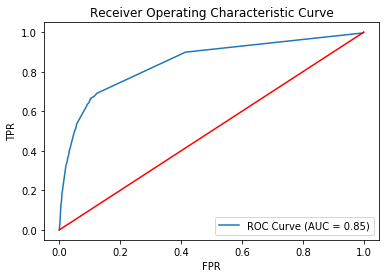

In [44]:
AUC_DT=roc_auc_score(y_test, DT_Pruned.predict_proba(X_test)[:,1])
y_prob = DT_Pruned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_DT)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

In [45]:
#Try bagging Classifier
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=DT_Pruned, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
Bagging_Acc=bgcl.score(X_test, y_test)
print(classification_report(y_test, bgcl.predict(X_test)))
print(roc_auc_score(y_test, bgcl.predict_proba(X_test)[:,1]))

0.9037157180772634
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.64      0.36      0.46      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564

0.8784557649050193


Specificity :  0.9742778656455506
Sensitivity :  0.35718891038039974
F1-Score:0.46 


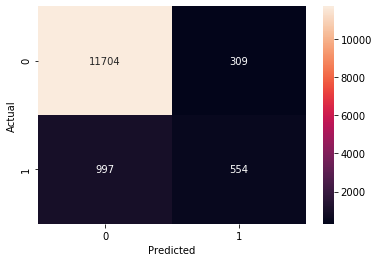

In [46]:
y_pred=bgcl.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

specificity_bg= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_bg)

sensitivity_bg = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_bg)

F1_bg= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

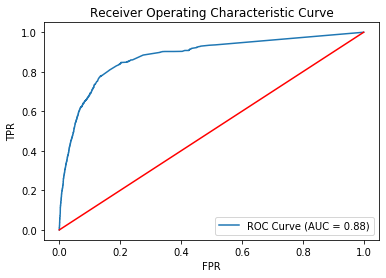

In [47]:
AUC_bg=roc_auc_score(y_test, bgcl.predict_proba(X_test)[:,1])
y_prob = bgcl.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_bg)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

In [48]:
# Try Gradient Boosting algorithm

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [50]:
print(gbcl.score(X_test , y_test))
Bagging_Acc=gbcl.score(X_test, y_test)
print(roc_auc_score(y_test, gbcl.predict_proba(X_test)[:,1]))
y_pred=gbcl.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

0.904452963727514
0.9131911845125014


In [51]:
specificity_gb= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_gb)

sensitivity_gb = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_gb)

F1_gb= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_gb=roc_auc_score(y_test, gbcl.predict_proba(X_test)[:,1])
print("AUC_gb :", AUC_gb)

Specificity :  0.9753600266378091
Sensitivity :  0.3552546744036106
F1-Score:0.46 
AUC_gb : 0.9131911845125014


In [52]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [53]:
print(rfcl.score(X_test , y_test))
RF_Acc=rfcl.score(X_test, y_test)
print(roc_auc_score(y_test, rfcl.predict_proba(X_test)[:,1]))
y_pred=rfcl.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

0.9074756708935418
0.9246094508726658


In [54]:
specificity_rf= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_rf)

sensitivity_rf = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_rf)

F1_rf= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_rf=roc_auc_score(y_test, gbcl.predict_proba(X_test)[:,1])
print("AUC_rf :", AUC_rf)

Specificity :  0.9663697660867394
Sensitivity :  0.4513217279174726
F1-Score:0.53 
AUC_rf : 0.9131911845125014


In [55]:
#With Hyper Parameters Tuning
#importing modules
from sklearn.model_selection import GridSearchCV
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)

Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 20, 'n_jobs': -1, 'random_state': 123}


In [56]:
print(model1.score(X_test , y_test))
RF_Acc_Tuned=model1.score(X_test, y_test)
print(roc_auc_score(y_test, model1.predict_proba(X_test)[:,1]))
y_pred=model1.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

0.9058537304629902
0.9230639512975494


Specificity :  0.9735286772662949
Sensitivity :  0.38168923275306255
F1-Score:0.48 
AUC_rf : 0.9230639512975491


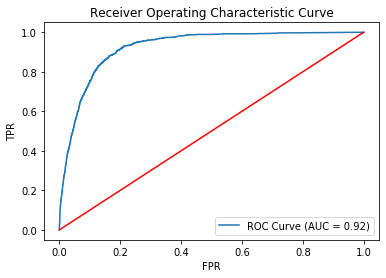

In [57]:
specificity_rf_tuned= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_rf_tuned)

sensitivity_rf_tuned = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_rf_tuned)

F1_rf_tuned= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))



AUC_rf_tuned=roc_auc_score(y_test, model1.predict_proba(X_test)[:,1])
print("AUC_rf :", AUC_rf_tuned)
y_prob = model1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_rf_tuned)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

In [58]:
#Tuning Gradient Boosting

In [59]:
from sklearn.model_selection import cross_validate #Additional scklearn functions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [60]:
predictors=X_train.columns

In [61]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train[predictors], y_train)
    
    #Predict training set:
    dtrain_predictions = alg.predict(X_train[predictors])
    dtrain_predprob = alg.predict_proba(X_train[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train[predictors], y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_train.values, dtrain_predictions))
    print("AUC Score (Train): %f" %roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9118
AUC Score (Train): 0.933350
CV Score : Mean - 0.9236382 | Std - 0.004352171 | Min - 0.9172191 | Max - 0.9300642


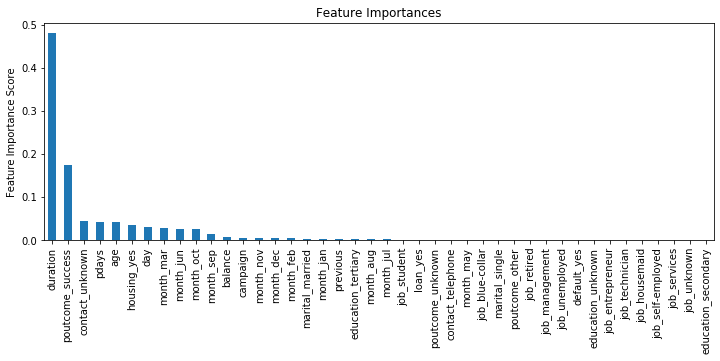

In [62]:
#Choose all predictors 
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train, predictors)

In [63]:
# Grid Search for number of trees

param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(X_train[predictors],y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [64]:
#The output can be checked using following command:

gsearch1.best_params_, gsearch1.best_score_

#Optimum no. of estimators/trees = 80

({'n_estimators': 80}, 0.9284515846121156)

In [65]:
#Tuning tree-specific parameters
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_features='sqrt',
                                                               subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch2.fit(X_train[predictors],y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 13, 'min_samples_split': 600}, 0.9327304973593817)


Model Report
Accuracy : 0.9308
AUC Score (Train): 0.960027
CV Score : Mean - 0.9327305 | Std - 0.003370518 | Min - 0.9287478 | Max - 0.9384158


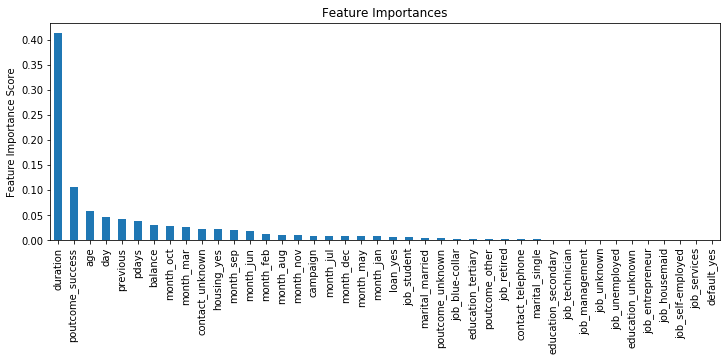

In [66]:
modelfit(gsearch2.best_estimator_,X_train, predictors)

In [67]:
param_test4 = {'max_features':range(4,17,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,min_samples_split=600,
                                                               max_features='sqrt', subsample=0.8, random_state=10,
                                                               min_samples_leaf=30, max_depth=13), 
param_grid = param_test4, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 12}, 0.9326503921256156)

In [68]:
#Model with best parameters and predict

GBM_tuned=GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_features=12, subsample=0.8, 
                                     random_state=10, min_samples_leaf=30, min_samples_split=600, max_depth=13)
GBM_tuned.fit(X_train, y_train)

print(GBM_tuned.score(X_test , y_test))
GBM_tuned_Acc_=GBM_tuned.score(X_test, y_test)
print("AUC_GBM_tuned:",roc_auc_score(y_test, GBM_tuned.predict_proba(X_test)[:,1]))
y_pred=GBM_tuned.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

0.9091713358891182
AUC_GBM_tuned: 0.9338540028873729


Specificity :  0.96129193373845
Sensitivity :  0.5054803352675693
F1-Score:0.56 


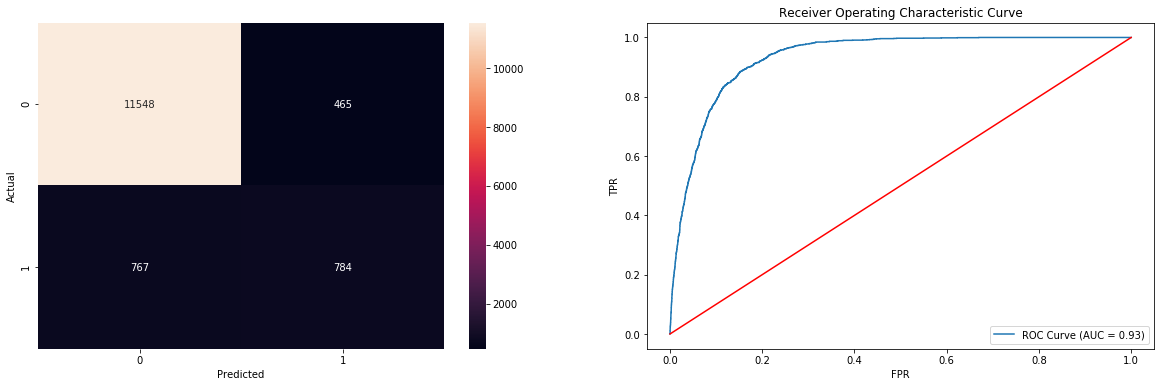

In [69]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

specificity_GBM_tuned= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_GBM_tuned)

sensitivity_GBM_tuned = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_GBM_tuned)

F1_GBM_tuned= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))


AUC_GBM_tuned=roc_auc_score(y_test, GBM_tuned.predict_proba(X_test)[:,1])
y_prob = GBM_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.subplot(1,2,2)
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_GBM_tuned)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

In [70]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()
from sklearn.model_selection import GridSearchCV

In [71]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train[predictors].values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train[predictors], y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train[predictors])
    dtrain_predprob = alg.predict_proba(X_train[predictors])[:,1]
        
    #Print model report:
    print( "\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(y_train.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(y_train, dtrain_predprob))

In [72]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, X_train, predictors)


Model Report
Accuracy : 0.929
AUC Score (Train): 0.958597


In [73]:
#Tune max_depth and min_child_weight

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 7, 'min_child_weight': 1}, 0.9328723983130374)

In [74]:
param_test2 = {
 'max_depth':[6,7,8],
 'min_child_weight':[0.5,1,2]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 6, 'min_child_weight': 0.5}, 0.9329934135907962)

In [75]:
#Tune gamma

param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=6,
 min_child_weight=0.5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.0}, 0.9329934135907962)

In [76]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=0.5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, X_train, predictors)


Model Report
Accuracy : 0.9416
AUC Score (Train): 0.970547


In [77]:
#Tune subsample and colsample_bytree

param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=6,
 min_child_weight=0.5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train, y_train)
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.9}, 0.9330285378682237)

In [78]:
#Tuning Regularization Parameters

param_test5 = {
 'reg_alpha':[0.5,0.8, 1, 1.5]}    
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=6,
 min_child_weight=0.5, gamma=0, subsample=0.9, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch5.fit(X_train, y_train)
gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 1}, 0.9334898676671504)

In [79]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=140,
 max_depth=6,
 min_child_weight=0.5,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.6,
 reg_alpha=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, X_train, predictors)


Model Report
Accuracy : 0.9358
AUC Score (Train): 0.964883


In [80]:
#Model with best parameters and predict

XGB_tuned=XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=6,
 min_child_weight=0.5, gamma=0, subsample=0.9, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27, reg_alpha=1)
XGB_tuned.fit(X_train, y_train)

print(XGB_tuned.score(X_test , y_test))
XGB_tuned_Acc_=XGB_tuned.score(X_test, y_test)
print("AUC_GBM_tuned:",roc_auc_score(y_test, XGB_tuned.predict_proba(X_test)[:,1]))
y_pred=XGB_tuned.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

0.908950162194043
AUC_GBM_tuned: 0.9350539977564599


Specificity :  0.9645384167152252
Sensitivity :  0.47840103159252095
F1-Score:0.55 


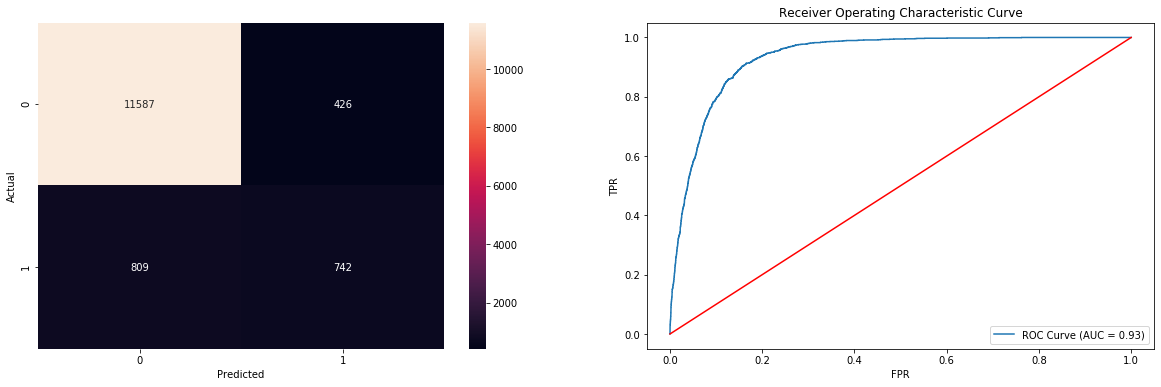

In [81]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")


specificity_XGB_tuned= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_XGB_tuned)

sensitivity_XGB_tuned = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_XGB_tuned)

F1_XGB_tuned= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_XGB_tuned=roc_auc_score(y_test, XGB_tuned.predict_proba(X_test)[:,1])
y_prob = XGB_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.subplot(1,2,2)
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_GBM_tuned)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

# The data is highly imblanced which can hamper model performance as the machine learns from it.
Oversample the minority class or downsample the majority class to balance the data

In [82]:
df.Target.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [83]:
from sklearn.utils import resample
df_majority = df[df.Target==0]
df_minority = df[df.Target==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=15000,    # to make a ratio respectable i.e. 33:67
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Target.value_counts()

0    39922
1    15000
Name: Target, dtype: int64

In [84]:
Df=pd.get_dummies(df_upsampled.iloc[:,0:16], drop_first=True)
X=Df
y=df_upsampled.Target
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=1)

In [85]:
#Try random forest

RF_New=RandomForestClassifier(n_estimators=50)
RF_New.fit(X_train, y_train)

print(RF_New.score(X_test , y_test))
RF_New_Acc=RF_New.score(X_test, y_test)
print("AUC_RF_New:",roc_auc_score(y_test, RF_New.predict_proba(X_test)[:,1]))
y_pred=RF_New.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

specificity_RF_New= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_RF_New)

sensitivity_RF_New = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_RF_New)

F1_RF_New= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_RF_New=roc_auc_score(y_test, RF_New.predict_proba(X_test)[:,1])

0.9469563634156704
AUC_RF_New: 0.9881804243557878
Specificity :  0.9516759544206936
Sensitivity :  0.9342164346654692
F1-Score:0.90 


In [86]:
#Try Gradient Boosting

GBM_New=GradientBoostingClassifier(n_estimators=50)
GBM_New.fit(X_train, y_train)

print(GBM_New.score(X_test , y_test))
GBM_New_Acc=GBM_New.score(X_test, y_test)
print("AUC_GBM_New:",roc_auc_score(y_test, GBM_New.predict_proba(X_test)[:,1]))
y_pred=GBM_New.predict(X_test)
cm=confusion_matrix(y_test,y_pred)


specificity_GBM_New= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_GBM_New)

sensitivity_GBM_New = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_GBM_New)

F1_GBM_New= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_GBM_New=roc_auc_score(y_test, GBM_New.predict_proba(X_test)[:,1])

0.8542210353826546
AUC_GBM_New: 0.9194607861500004
Specificity :  0.9177409964235216
Sensitivity :  0.6827570722945667
F1-Score:0.72 


In [87]:
#Try Decision Tree
DT_New=DecisionTreeClassifier()
DT_New.fit(X_train, y_train)

print(DT_New.score(X_test , y_test))
DT_New_Acc=DT_New.score(X_test, y_test)
print("AUC_DT_New:",roc_auc_score(y_test, DT_New.predict_proba(X_test)[:,1]))
y_pred=DT_New.predict(X_test)
cm=confusion_matrix(y_test,y_pred)


specificity_DT_New= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_DT_New)

sensitivity_DT_New = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_DT_New)

F1_DT_New= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_DT_New=roc_auc_score(y_test, DT_New.predict_proba(X_test)[:,1])

0.9221945742550222
AUC_DT_New: 0.9235052065489954
Specificity :  0.9206520835066123
Sensitivity :  0.9263583295913785
F1-Score:0.87 


# Try Stacking using vecstack package

In [88]:
from vecstack import stacking
models = [
    GradientBoostingClassifier(random_state=0, 
                           n_estimators=100, learning_rate=0.1, max_depth=5),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=5)
]

The above models are the level 1 models, the predictions of which will be used by the beta model for final predictions

In [89]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False,      
                           mode='oof_pred_bag',       
                           needs_proba=False,         
                           save_dir=None,            
                           metric='roc_auc',     
                           n_folds=4,                 
                           stratified=True,            
                           shuffle=True,            
                           random_state=0,         
                           )

In [90]:
#The beta model is below which is a XGBoost classifier

In [91]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=5)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)





specificity_Stacked= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_Stacked)

sensitivity_Stacked = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_Stacked)

F1_Stacked= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_Stacked=roc_auc_score(y_test, model.predict_proba(S_test)[:,1])
print('AUC_Stacked : ', AUC_Stacked )

Final prediction score: [0.94568186]
Specificity :  0.9503451717541379
Sensitivity :  0.9330938482263135
F1-Score:0.90 
AUC_Stacked :  0.956711897914867


In [92]:
#Try stacking on the original data
Df=pd.get_dummies(df.iloc[:,0:16], drop_first=True)
X=Df
y=df.Target
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=1)

In [93]:
models = [
    GradientBoostingClassifier(random_state=0, 
                           n_estimators=100, learning_rate=0.1, max_depth=5),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=5)
]

In [94]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False,      
                           mode='oof_pred_bag',       
                           needs_proba=False,         
                           save_dir=None,            
                           metric='roc_auc',     
                           n_folds=4,                 
                           stratified=True,            
                           shuffle=True,            
                           random_state=0,         
                           )

In [95]:
#The beta model is below which is a XGBoost classifier

In [96]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=5)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)


specificity_Stacked_orig= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_Stacked_orig)

sensitivity_Stacked_orig = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_Stacked_orig)

F1_Stacked_orig= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_Stacked_orig=roc_auc_score(y_test, model.predict_proba(S_test)[:,1])
print('AUC_Stacked : ', AUC_Stacked_orig )

Final prediction score: [0.90953996]
Specificity :  0.9632065262632149
Sensitivity :  0.4938749194068343
F1-Score:0.56 
AUC_Stacked :  0.7301586240953346


In [98]:
Comparison_orig={'Accuracy':[Acc_LogReg,Acc_Test_DT, Bagging_Acc, 0.90, RF_Acc, RF_Acc_Tuned, GBM_tuned_Acc_, XGB_tuned_Acc_, 0.91],
           'Area Under Curve':[AUC_LogReg,AUC_DT, AUC_bg, 0.88, AUC_rf, AUC_rf_tuned, AUC_GBM_tuned, AUC_XGB_tuned, AUC_Stacked_orig],
           'Sensitivity': [sensitivity_LogReg,sensitivity_DT, sensitivity_bg, sensitivity_gb, sensitivity_rf, sensitivity_rf_tuned
                           ,sensitivity_GBM_tuned, sensitivity_XGB_tuned, sensitivity_Stacked_orig],
            'Specificity': [specificity_LogReg,specificity_DT, specificity_bg, specificity_gb, specificity_rf, specificity_rf_tuned
                           ,specificity_GBM_tuned, specificity_XGB_tuned, specificity_Stacked_orig],
            'F1score': [F1_LogReg,F1_DT, F1_bg, F1_gb, F1_rf, F1_rf_tuned,F1_GBM_tuned, F1_XGB_tuned, F1_Stacked_orig]}
Comparison_orig = pd.DataFrame(Comparison_orig, index=['Logistic Reg','DT','Bagging', 'Gradient Boosting',
                                                       'RF','RF_Tuned', 'GBM_Tuned', 'XGBoost_Tuned', 'Stacked Ensemble'])
Comparison_orig

,Accuracy,Area Under Curve,Sensitivity,Specificity,F1score
Logistic Reg,0.893984,0.906830,0.615732,0.929909,0.570490
DT,0.902536,0.847261,0.395874,0.967951,0.481569
Bagging,0.904453,0.878456,0.357189,0.974278,0.458989
Gradient Boosting,0.900000,0.880000,0.355255,0.975360,0.459550
RF,0.907476,0.913191,0.451322,0.966370,0.527307
RF_Tuned,0.905854,0.923064,0.381689,0.973529,0.481105
GBM_Tuned,0.909171,0.933854,0.505480,0.961292,0.560000
XGBoost_Tuned,0.908950,0.935054,0.478401,0.964538,0.545789
Stacked Ensemble,0.910000,0.730159,0.493875,0.963207,0.555274


Text(0.5, 1.0, 'Evaluation Metrics Comparison with Original Data')

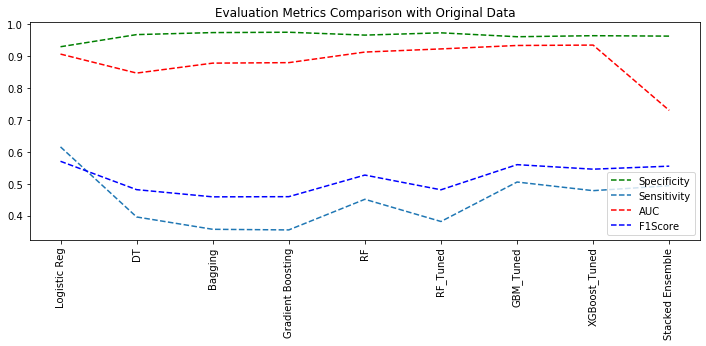

In [99]:
plt.plot(Comparison_orig.index,Comparison_orig.Specificity, 'g--', label='Specificity')
plt.plot(Comparison_orig.index,Comparison_orig.Sensitivity, '--', label='Sensitivity')
plt.plot(Comparison_orig.index,Comparison_orig['Area Under Curve'], 'r--', label='AUC')
plt.plot(Comparison_orig.index,Comparison_orig.F1score, 'b--', label='F1Score')
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.title("Evaluation Metrics Comparison with Original Data")

In [100]:
# Comparison of models with imbalance treatment

Comparison_treated={'Accuracy':[RF_New_Acc, GBM_New_Acc, DT_New_Acc, 0.95],
           'Area Under Curve':[AUC_RF_New, AUC_GBM_New, AUC_DT_New, AUC_Stacked],
           'Sensitivity': [sensitivity_RF_New, sensitivity_GBM_New, sensitivity_DT_New, sensitivity_Stacked],
            'Specificity': [specificity_RF_New, specificity_GBM_New, specificity_DT_New, specificity_Stacked],
             'F1Score': [F1_RF_New, F1_GBM_New, F1_DT_New, F1_Stacked]      }
Comparison_treated = pd.DataFrame(Comparison_treated, index=['RF','Gradient Boosting','Decision_Tree','Stacked Ensemble'])
Comparison_treated

,Accuracy,Area Under Curve,Sensitivity,Specificity,F1Score
RF,0.946956,0.988180,0.934216,0.951676,0.904959
Gradient Boosting,0.854221,0.919461,0.682757,0.917741,0.716879
Decision_Tree,0.922195,0.923505,0.926358,0.920652,0.865534
Stacked Ensemble,0.950000,0.956712,0.933094,0.950345,0.902791


Text(0.5, 1.0, 'Evaluation Metrics Comparison - With Balanced Data')

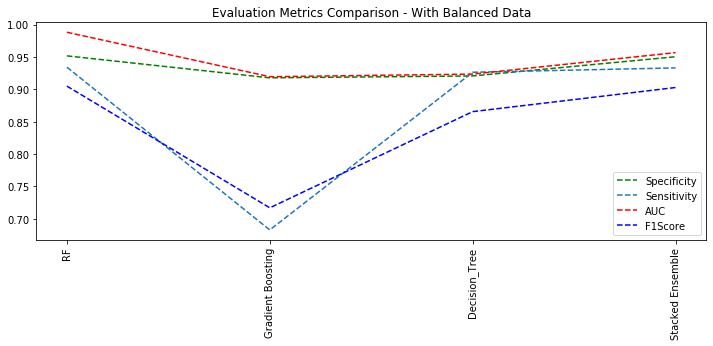

In [101]:
plt.plot(Comparison_treated.index,Comparison_treated.Specificity, 'g--', label='Specificity')
plt.plot(Comparison_treated.index,Comparison_treated.Sensitivity, '--', label='Sensitivity')
plt.plot(Comparison_treated.index,Comparison_treated['Area Under Curve'], 'r--', label='AUC')
plt.plot(Comparison_treated.index,Comparison_treated['F1Score'], 'b--', label='F1Score')
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.title("Evaluation Metrics Comparison - With Balanced Data")

# The evaluation metric values after treating the imbalance in the data are very high. There could be overfitting. Introduction of regularization to prevent overfitting

Logistic Regression Coefficient with L1 Regularization - Below

In [102]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [182]:
sel = SelectFromModel(LogisticRegression(penalty = 'l1', C=0.05,solver = 'liblinear'))
sel.fit(X_train, y_train)
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False, False, False,
        True, False, False,  True, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True])

In [183]:
X_train_l1 = sel.transform(X_train)
X_test_l1 = sel.transform(X_test)

In [188]:
#Try GBM

GBM_RegL1=GradientBoostingClassifier(n_estimators=500)
GBM_RegL1.fit(X_train_l1, y_train)

print(GBM_RegL1.score(X_test_l1 , y_test))
GBM_RegL1_Acc=GBM_RegL1.score(X_test_l1, y_test)
print("AUC:",roc_auc_score(y_test, GBM_RegL1.predict_proba(X_test_l1)[:,1]))
y_pred=GBM_RegL1.predict(X_test_l1)
cm=confusion_matrix(y_test,y_pred)

specificity_GBM_RegL1= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_GBM_RegL1)

sensitivity_GBM_RegL1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_GBM_RegL1)

F1_GBM_RegL1= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_GBM_RegL1=roc_auc_score(y_test, GBM_RegL1.predict_proba(X_test_l1)[:,1])

0.9074019463285167
AUC: 0.9311770726780352
Specificity :  0.9647049030217265
Sensitivity :  0.463571889103804
F1-Score:0.53 


In [197]:
#Try Stacking

models = [
    GradientBoostingClassifier(random_state=0, 
                           n_estimators=100, learning_rate=0.1, max_depth=4),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=4)
]

In [198]:
S_train, S_test = stacking(models,                   
                           X_train_l1, y_train, X_test_l1,   
                           regression=False,      
                           mode='oof_pred_bag',       
                           needs_proba=False,         
                           save_dir=None,            
                           metric='roc_auc',     
                           n_folds=4,                 
                           stratified=True,            
                           shuffle=True,            
                           random_state=0,         
                           )

In [199]:
#Meta model - xgboost
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.05, 
                      n_estimators=100, max_depth=5)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)


specificity_Stacked_L1= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity_Stacked_L1)

sensitivity_Stacked_L1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity_Stacked_L1)

F1_Stacked_L1= f1_score(y_test,y_pred)
print( "F1-Score:%.2f " %f1_score(y_test,y_pred))

AUC_Stacked_L1=roc_auc_score(y_test, model.predict_proba(S_test)[:,1])
print('AUC_Stacked : ', AUC_Stacked_L1 )

Final prediction score: [0.90931879]
Specificity :  0.9641222009489719
Sensitivity :  0.48484848484848486
F1-Score:0.55 
AUC_Stacked :  0.7259843905401644
